# Define the agents

In [1]:
import random
import math
from numpy.core.shape_base import atleast_2d
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch



In [2]:
# Import functions in the function file

%run trade_functions.ipynb


## define encounter matrix

In [3]:
economy_size=1000

In [4]:
import numpy as np

# Create a 100x100 matrix filled with 1s
matrix = np.ones((economy_size, economy_size))

# And  Set the diagonal elements to 0
np.fill_diagonal(matrix, 0)


## Define Economy 

In [5]:
agent_a = create_agent()
agent_a['id_list'] = [i for i in range(economy_size)]
agent_a['parameter']=[[3,3,3] for _ in range(economy_size)]
agent_a['money']=[1 for _ in range(economy_size)]
agent_a['gooda']=[0.5 for _ in range(economy_size)]
agent_a['goodb']=[1 for _ in range(economy_size)]
agent_a['intra_connections']=matrix
agent_a['inter_connections']=matrix

In [6]:
agent_b = create_agent()
agent_b['id_list'] = [i for i in range(economy_size)]
agent_b['parameter']=[[3,3,3] for _ in range(economy_size)]
agent_b['money']=[1 for _ in range(economy_size)]
agent_b['gooda']=[0.5 for _ in range(economy_size)]
agent_b['goodb']=[1 for _ in range(economy_size)]
agent_b['intra_connections']=matrix
agent_b['inter_connections']=matrix


In [7]:
agent_c = create_agent()
agent_c['id_list'] = [i for i in range(economy_size)]
agent_c['parameter']=[[2,2,2] for _ in range(economy_size)]
agent_c['money']=[1 for _ in range(economy_size)]
agent_c['gooda']=[0.5 for _ in range(economy_size)]
agent_c['goodb']=[1 for _ in range(economy_size)]

agent_c['constant']=[1 for _ in range(economy_size)]
agent_c['intra_connections']=matrix
agent_c['inter_connections']=matrix

#Defne  inhomogeneous economy

## trade function

In [8]:
def tester(agent1,agent2,gm,length,size,f1,f2):
  
  
  mla=[gm[2]]*economy_size
  gala=[gm[0]]*economy_size
  gbla=[gm[1]]*economy_size
  
  parametera=agent2['parameter'].copy()
    
  mlb=agent1['money'].copy()
  galb=agent1['gooda'].copy()
  gblb=agent1['goodb'].copy()
  constant=agent1['constant'].copy()
  parameterb=agent1['parameter'].copy()
  sum_eta=np.sum(agent1['parameter'][2])
  sum_alpha1=np.sum(agent1['parameter'][0])
  sum_alpha2=np.sum(agent1['parameter'][1])
 

  

  ga2_history=[]
  gb2_history=[]
  m2_history=[] 

  for i in range(length[0]):
    
        gala,gbla,mla=intra_trade(gala,gbla,mla,parametera,matrix,1,f1,f2)
        
      
        
        galb,gblb,mlb=intra_trade(galb,gblb,mlb,parameterb,matrix,1,f1,f2)
        
      
        # test v1,v2 and beta
        gala,gbla,mla,galb,gblb,mlb=test_trade(gala,gbla,mla,galb,gblb,mlb,parametera,parameterb,matrix,1,[1,0,0],f1,f2)
        gala,gbla,mla,galb,gblb,mlb=test_trade(gala,gbla,mla,galb,gblb,mlb,parametera,parameterb,matrix,1,[0,1,0],f1,f2)
        gala,gbla,mla,galb,gblb,mlb=test_trade(gala,gbla,mla,galb,gblb,mlb,parametera,parameterb,matrix,1,[0,0,1],f1,f2)
    
        
       
      
    

    
    
  
    

  for k in range (8):
      size=size*0.5
    
      for j in range(length[1]):
        
        gala,gbla,mla=intra_trade(gala,gbla,mla,parametera,matrix,1,f1,f2)
        
      
        
        galb,gblb,mlb=intra_trade(galb,gblb,mlb,parameterb,matrix,1,f1,f2)
        
      
        # test v1,v2 and beta
        gala,gbla,mla,galb,gblb,mlb=test_trade(gala,gbla,mla,galb,gblb,mlb,parametera,parameterb,matrix,size,[1,0,0],f1,f2)
        gala,gbla,mla,galb,gblb,mlb=test_trade(gala,gbla,mla,galb,gblb,mlb,parametera,parameterb,matrix,size,[0,1,0],f1,f2)
        gala,gbla,mla,galb,gblb,mlb=test_trade(gala,gbla,mla,galb,gblb,mlb,parametera,parameterb,matrix,size,[0,0,1],f1,f2)
    
        
       
        ga2_history.append(sum(galb))
        gb2_history.append(sum(gblb))
        m2_history.append(sum(mlb))
        

  return ga2_history,gb2_history,m2_history

In [9]:
def get_value(lst,sum_p,lenx):
    sub_list=lst[-lenx:]
    value_list=[ sum_p/x for x in sub_list]
    return np.mean(value_list)
    

In [10]:
def get_v(gm1,length1,f1):
   
    vga,vgb,vm=tester(agent_c,agent_a,gm1,length1,1,f1,utility_func_cd)
    
    mvga=get_value(vga,2000,10000)
    mvgb=get_value(vgb,2000,10000)
    mvm=get_value(vm,2000,10000)
    
  
    return mvga,mvgb,mvm
        

In [11]:
gm1=[1,0.5,1]
v1l=[]
v2l=[]
for i in range(10):
    v1t=[]
    v2t=[]
    for j in range (20):
        g11,g21,g31=get_v(gm1,[20000,20000],utility_func_s)
        v1t.append(g11)
        v2t.append(g21)
    print(i,v1t,v2t)
    v1l.append(np.mean(v1t))
    v2l.append(np.mean(v2t))
    gm1[0]=gm1[0]+0.03
    
    
    
    

[2.2330024086793303, 2.251643934672923, 2.21989932132952, 2.2497876453612693, 2.2349721547761585, 2.2386682327813747, 2.2326479382330446, 2.251085171915469, 2.2406727950537646, 2.223900523584483, 2.230647528225934, 2.2245324820196406, 2.2326707759026845, 2.23931843836571, 2.2333561688189483, 2.2398584578493863, 2.2469326109535572, 2.2435680359504344, 2.2469237032182314, 2.2366754358768395] [3.3427119228421236, 3.3692548080226903, 3.3528862701952966, 3.3561373846272136, 3.345815621472252, 3.306979143118333, 3.377510735935754, 3.3392402276235598, 3.3268377551921673, 3.338394976640408, 3.319683730942191, 3.312506802825965, 3.323357172292226, 3.335114249184906, 3.352720267788179, 3.3484991655719734, 3.319095499139745, 3.3856495181324155, 3.3175414609578335, 3.3196719994782273]
[2.1724216985812346, 2.1712494474932336, 2.171376550406024, 2.180918262345403, 2.182140425825568, 2.1747975450112715, 2.1748943265915264, 2.18153035858331, 2.182319161234187, 2.168636577713195, 2.1683029301621906, 2.

3.098731916045428 2.2795608840626365 2.9912068203394413
3.082483670485688 2.211274673607258 3.0042604201334098
3.0492337286023803 2.166282258246335 3.0116034284141597
3.0395844142897936 2.137771981439962 2.9816283188294737
3.00125672601357 2.0857163952903113 3.0133695922446577
2.9865778987957117 2.061602717755438 3.0048607493515496
2.975671980404925 2.0023806427937596 2.9851507280470835
2.926500561189917 1.959234904101207 3.009318538596631
2.9194627155869757 1.926232177244511 2.992783166569056
2.9244561254309427 1.8950682238636383 3.017348497658414

In [16]:
gm1=[1,0.5,1]
v1lc=[]
v2lc=[]
for i in range(10):
    v1t=[]
    v2t=[]
    for j in range (20):
        g11,g21,g31=get_v(gm1,[20000,20000],utility_func_c)
        v1t.append(g11)
        v2t.append(g21)
    print(v1t,v2t)
    v1lc.append(np.mean(v1t))
    v2lc.append(np.mean(v2t))
    gm1[0]=gm1[0]+0.03

[1.4210841819966182, 1.4368322587333735, 1.4315728092866302, 1.432889779841953, 1.429605921393996, 1.4337378116594541, 1.4341942093423095, 1.4197058096643806, 1.4342353698787638, 1.4213881605590954, 1.4235795849206887, 1.4210533533370704, 1.4349276520745027, 1.4192452288242166, 1.4249510007357986, 1.431734939758021, 1.4140190896260705, 1.4250717453958064, 1.4261620187488382, 1.4093297568150327] [4.914922237605632, 4.96046773767957, 4.924104714948237, 4.943442719180774, 4.956574757923136, 4.994567616054289, 4.945680440696194, 4.938333243184495, 5.01768218930244, 4.94152024847907, 4.98486931704733, 4.989475478166773, 4.962740333975982, 4.964130556941311, 4.970081212834354, 4.987406926377545, 4.954213853949712, 4.979557889871918, 4.979516095463911, 4.94525026650896]
[1.3709107703225172, 1.361709906398318, 1.371620117185498, 1.385831743693023, 1.3740821354742474, 1.3725949832627866, 1.372460823133159, 1.3675172486158482, 1.3776368418543365, 1.3595810972810136, 1.3809367585247305, 1.3732899

In [21]:
# define G1 list
ga=result = [1+ i * 0.03 for i in range(10)]

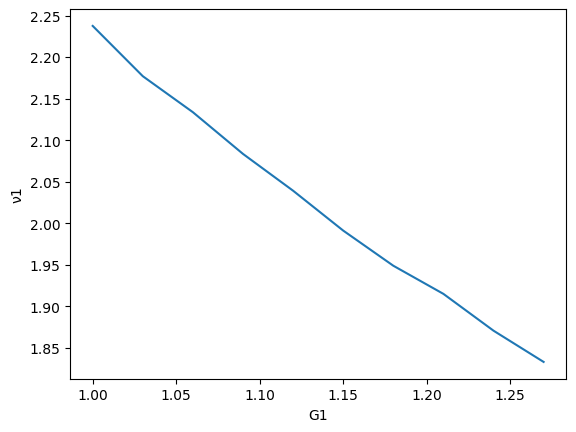

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Example data


# Calculate the numerical derivative of priceb with respect to ga


# Plot the derivative
plt.plot(ga, v1l)

# Add labels and title
plt.xlabel('G1')
plt.ylabel('ν1')


# Show the plot
plt.show()

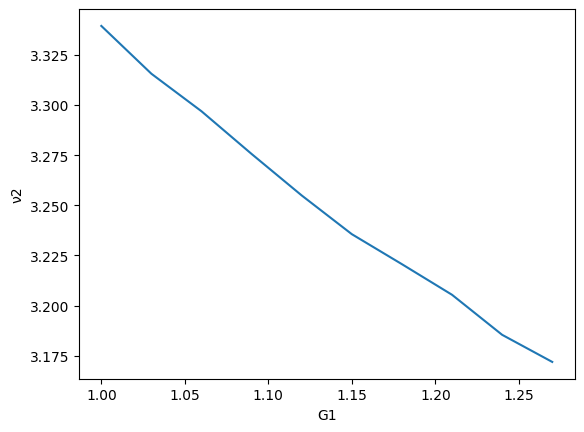

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Example data




# Plot the derivative
plt.plot(ga, v2l)

# Add labels and title
plt.xlabel('G1')
plt.ylabel('ν2')


# Show the plot
plt.show()

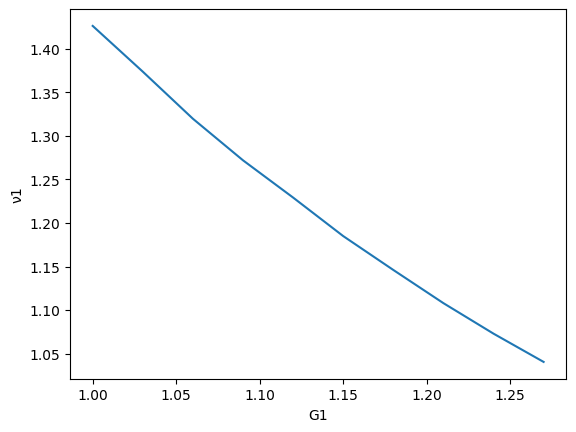

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Example data




# Plot the derivative
plt.plot(ga, v1lc)

# Add labels and title
plt.xlabel('G1')
plt.ylabel('ν1')


# Show the plot
plt.show()

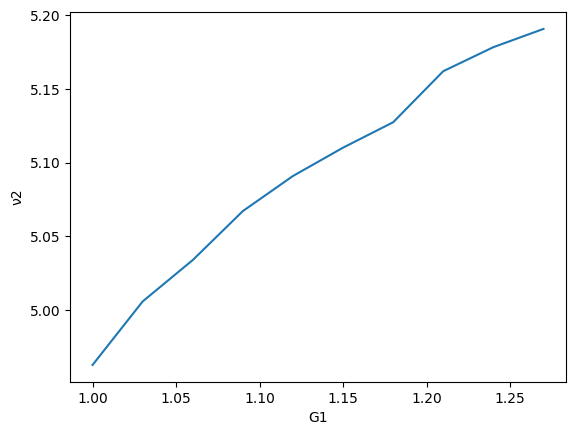

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Example data




# Plot the derivative
plt.plot(ga, v2lc)

# Add labels and title
plt.xlabel('G1')
plt.ylabel('ν2')


# Show the plot
plt.show()

# Derivatives

In [ ]:
gm1=[0.5,1,1]
v1l=[]
v2l=[]
for i in range(10):
    v1t=[]
    v2t=[]
    for j in range (20):
        g11,g21,g31=get_v(gm1,[20000,20000],utility_func_s)
        v1t.append(g11)
        v2t.append(g21)
    print(i,v1t,v2t)
    v1l.append(np.mean(v1t))
    v2l.append(np.mean(v2t))
    gm1[0]=gm1[0]+0.03